In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import linear_model
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import Lasso

In [2]:
df = pd.read_csv('E.csv')

In [3]:
df.head(10)
dff = df.copy()

In [4]:
df.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
dtype: int64

In [5]:
#df.isnull().sum()
df.isnull().mean()*100

age                         4.347826
anaemia                     6.020067
creatinine_phosphokinase    0.000000
diabetes                    2.341137
ejection_fraction           4.013378
high_blood_pressure         2.675585
platelets                   0.000000
serum_creatinine            0.334448
serum_sodium                3.678930
sex                         1.672241
smoking                     3.678930
dtype: float64

In [6]:
df.isnull().sum()

age                         13
anaemia                     18
creatinine_phosphokinase     0
diabetes                     7
ejection_fraction           12
high_blood_pressure          8
platelets                    0
serum_creatinine             1
serum_sodium                11
sex                          5
smoking                     11
dtype: int64

In [7]:
df.head(20)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,NaN,0.0,582,0.0,20.0,1.0,265000.00,1.9,130.0,1.0,0.0
1,NaN,0.0,7861,0.0,38.0,0.0,263358.03,1.1,136.0,1.0,0.0
2,NaN,0.0,146,0.0,20.0,0.0,162000.00,1.3,129.0,1.0,1.0
3,NaN,1.0,111,0.0,20.0,0.0,210000.00,1.9,137.0,1.0,0.0
4,NaN,1.0,160,1.0,20.0,0.0,327000.00,2.7,116.0,0.0,0.0
5,NaN,1.0,47,0.0,40.0,1.0,204000.00,2.1,132.0,1.0,1.0
6,NaN,1.0,246,0.0,15.0,0.0,127000.00,NaN,137.0,1.0,0.0
7,NaN,1.0,315,1.0,60.0,0.0,454000.00,1.1,NaN,1.0,1.0
8,NaN,0.0,157,0.0,65.0,0.0,263358.03,1.5,138.0,0.0,0.0
9,NaN,1.0,123,0.0,35.0,1.0,388000.00,9.4,133.0,1.0,1.0


In [8]:
df.tail(20)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
279,55.0,0.0,84,1.0,38.0,0.0,451000.00,1.3,136.0,0.0,0.0
280,70.0,0.0,2695,1.0,40.0,0.0,241000.00,1.0,137.0,1.0,0.0
281,70.0,0.0,582,0.0,40.0,0.0,51000.00,2.7,136.0,1.0,1.0
282,42.0,0.0,64,0.0,30.0,0.0,215000.00,3.8,128.0,1.0,1.0
283,65.0,0.0,1688,0.0,38.0,0.0,263358.03,1.1,138.0,1.0,1.0
284,50.0,1.0,54,0.0,40.0,0.0,279000.00,0.8,141.0,1.0,0.0
285,55.0,1.0,170,1.0,40.0,0.0,336000.00,1.2,135.0,1.0,0.0
286,60.0,0.0,253,0.0,NaN,0.0,279000.00,1.7,140.0,1.0,0.0
287,45.0,0.0,582,1.0,55.0,0.0,543000.00,1.0,132.0,0.0,0.0
288,65.0,0.0,892,1.0,35.0,0.0,263358.03,1.1,142.0,0.0,0.0


Text(0.5, 1.0, 'age')

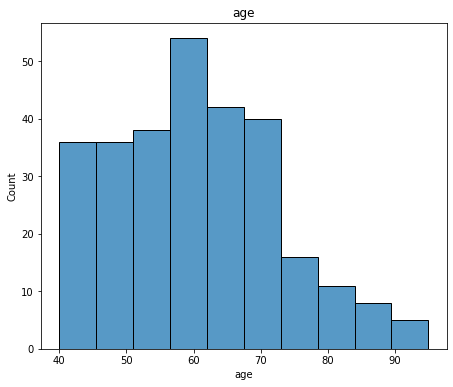

In [9]:
plt.figure(figsize = (16,6))
plt.subplot(121)
sns.histplot(df['age'])
plt.title('age')

In [10]:
## As the values of age are only missing in the start of the dataset, we can use end of distribution using max() value.
df['age'].fillna(df['age'].max(), inplace=True)

In [11]:
df.isnull().mean()*100

age                         0.000000
anaemia                     6.020067
creatinine_phosphokinase    0.000000
diabetes                    2.341137
ejection_fraction           4.013378
high_blood_pressure         2.675585
platelets                   0.000000
serum_creatinine            0.334448
serum_sodium                3.678930
sex                         1.672241
smoking                     3.678930
dtype: float64

Text(0.5, 1.0, 'New Age')

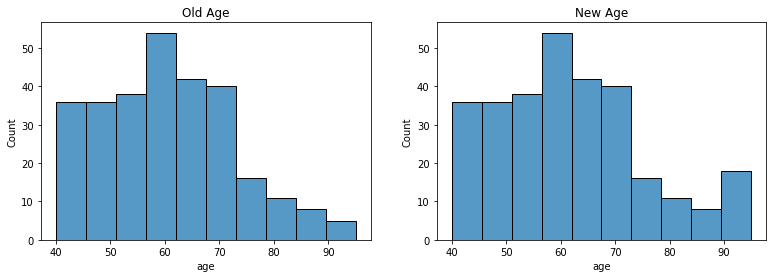

In [12]:
plt.figure(figsize = (13,4))
plt.subplot(121)
sns.histplot(dff['age'])
plt.title('Old Age')

plt.subplot(122)
sns.histplot(df['age'])
plt.title('New Age')

## No change in the distribution.

In [13]:
l = [col for col in df.columns if df[col].isnull().mean() <0.03
     and df[col].isnull().mean()>0]
l

['diabetes', 'high_blood_pressure', 'serum_creatinine', 'sex']

In [14]:
df.dropna(subset = l[2], inplace = True)

In [15]:
df.dropna(subset = l[3], inplace = True)

Text(0.5, 1.0, 'serum_creatinine')

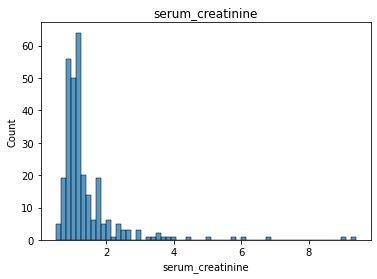

In [16]:
## We will need to change the distribution by normalisation method later.
plt.figure(figsize = (13,4))
plt.subplot(122)
sns.histplot(df['serum_creatinine'])
plt.title('serum_creatinine')

In [17]:
df.isnull().mean()*100

age                         0.000000
anaemia                     6.143345
creatinine_phosphokinase    0.000000
diabetes                    2.389078
ejection_fraction           4.095563
high_blood_pressure         2.730375
platelets                   0.000000
serum_creatinine            0.000000
serum_sodium                2.389078
sex                         0.000000
smoking                     3.071672
dtype: float64

In [18]:
arbitrary_values = {"diabetes":2}  # Define arbitrary values for each column

# Impute missing values with arbitrary values
for column, value in arbitrary_values.items():
    df[column].fillna(value, inplace=True)
    

Text(0.5, 1.0, 'diabetes')

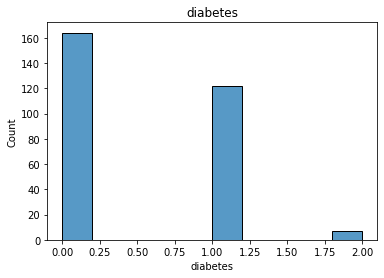

In [19]:
## We will need to change the distribution by normalisation method later.
plt.figure(figsize = (13,4))
plt.subplot(122)
sns.histplot(df['diabetes'])
plt.title('diabetes')

In [20]:
df.isnull().mean()*100

age                         0.000000
anaemia                     6.143345
creatinine_phosphokinase    0.000000
diabetes                    0.000000
ejection_fraction           4.095563
high_blood_pressure         2.730375
platelets                   0.000000
serum_creatinine            0.000000
serum_sodium                2.389078
sex                         0.000000
smoking                     3.071672
dtype: float64

In [21]:
def random_sampling_imputation(column):          
    non_missing_values = df[column].dropna()        
    random_samples = np.random.choice(non_missing_values, size=df[column].isnull().sum(), replace=True)
    df.loc[df[column].isnull(),column] = random_samples

Text(0.5, 1.0, 'high_blood_pressure')

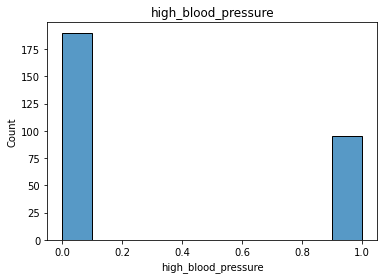

In [22]:
plt.figure(figsize = (13,4))
plt.subplot(122)
sns.histplot(df['high_blood_pressure'])
plt.title('high_blood_pressure')

In [23]:
random_sampling_imputation("high_blood_pressure")

In [24]:
df.isnull().mean()*100

age                         0.000000
anaemia                     6.143345
creatinine_phosphokinase    0.000000
diabetes                    0.000000
ejection_fraction           4.095563
high_blood_pressure         0.000000
platelets                   0.000000
serum_creatinine            0.000000
serum_sodium                2.389078
sex                         0.000000
smoking                     3.071672
dtype: float64

In [25]:
random_sampling_imputation("serum_sodium")

In [26]:
df.isnull().mean()*100

age                         0.000000
anaemia                     6.143345
creatinine_phosphokinase    0.000000
diabetes                    0.000000
ejection_fraction           4.095563
high_blood_pressure         0.000000
platelets                   0.000000
serum_creatinine            0.000000
serum_sodium                0.000000
sex                         0.000000
smoking                     3.071672
dtype: float64

Text(0.5, 1.0, 'smoking')

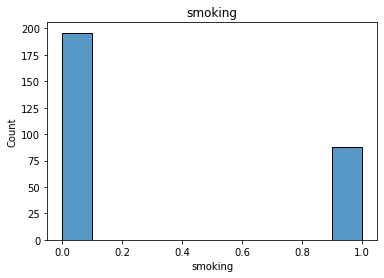

In [27]:
plt.figure(figsize = (13,4))
plt.subplot(122)
sns.histplot(df['smoking'])
plt.title('smoking')

In [28]:
# We can try this
# random_sampling_imputation("smoking")

In [29]:
##  Second Approach for the same is arbritrary value
arbitrary_values = {"smoking":2}  # Define arbitrary values for each column

# Impute missing values with arbitrary values
for column, value in arbitrary_values.items():
    df[column].fillna(value, inplace=True)

In [30]:
df.isnull().mean()*100

age                         0.000000
anaemia                     6.143345
creatinine_phosphokinase    0.000000
diabetes                    0.000000
ejection_fraction           4.095563
high_blood_pressure         0.000000
platelets                   0.000000
serum_creatinine            0.000000
serum_sodium                0.000000
sex                         0.000000
smoking                     0.000000
dtype: float64

Text(0.5, 1.0, 'ejection_fraction')

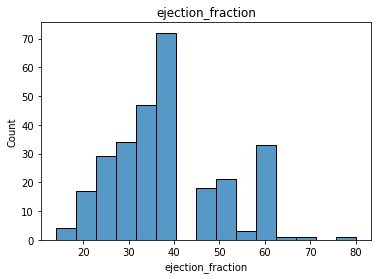

In [31]:
plt.figure(figsize = (13,4))
plt.subplot(122)
sns.histplot(df['ejection_fraction'])
plt.title('ejection_fraction')

In [32]:
## Normally Distruibuted, ideal method is Mean.
df['ejection_fraction'].fillna(df['ejection_fraction'].mean(),inplace=True)

In [33]:
df.isnull().mean()*100

age                         0.000000
anaemia                     6.143345
creatinine_phosphokinase    0.000000
diabetes                    0.000000
ejection_fraction           0.000000
high_blood_pressure         0.000000
platelets                   0.000000
serum_creatinine            0.000000
serum_sodium                0.000000
sex                         0.000000
smoking                     0.000000
dtype: float64

Text(0.5, 1.0, 'anaemia')

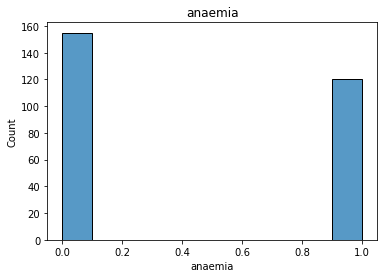

In [34]:
plt.figure(figsize = (13,4))
plt.subplot(122)
sns.histplot(df['anaemia'])
plt.title('anaemia')

In [35]:
random_sampling_imputation("anaemia")

In [36]:
df.isnull().mean()*100

age                         0.0
anaemia                     0.0
creatinine_phosphokinase    0.0
diabetes                    0.0
ejection_fraction           0.0
high_blood_pressure         0.0
platelets                   0.0
serum_creatinine            0.0
serum_sodium                0.0
sex                         0.0
smoking                     0.0
dtype: float64

/Users/sid24082/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'anaemia')

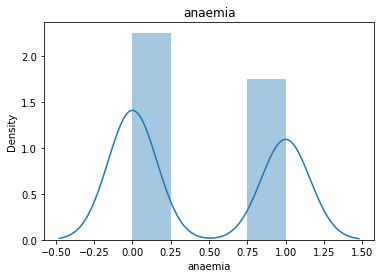

In [37]:
plt.figure(figsize = (13,4))
plt.subplot(122)
sns.distplot(df['anaemia'])
plt.title('anaemia')

Text(0.5, 1.0, 'ejection_fraction')

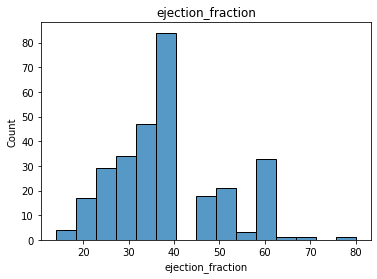

In [38]:
plt.figure(figsize = (13,4))
plt.subplot(122)
sns.histplot(df['ejection_fraction'])
plt.title('ejection_fraction')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 0 to 298
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       293 non-null    float64
 1   anaemia                   293 non-null    float64
 2   creatinine_phosphokinase  293 non-null    int64  
 3   diabetes                  293 non-null    float64
 4   ejection_fraction         293 non-null    float64
 5   high_blood_pressure       293 non-null    float64
 6   platelets                 293 non-null    float64
 7   serum_creatinine          293 non-null    float64
 8   serum_sodium              293 non-null    float64
 9   sex                       293 non-null    float64
 10  smoking                   293 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 27.5 KB


Text(0.5, 1.0, 'high_blood_pressure')

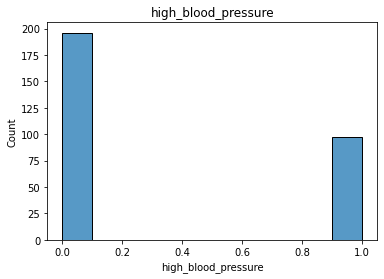

In [43]:
plt.figure(figsize = (13,4))
plt.subplot(122)
sns.histplot(df['high_blood_pressure'])
plt.title('high_blood_pressure')

Text(0.5, 1.0, 'platelets')

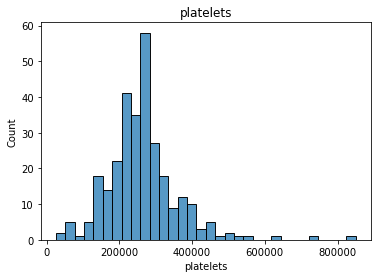

In [44]:
plt.figure(figsize = (13,4))
plt.subplot(122)
sns.histplot(df['platelets'])
plt.title('platelets')

Text(0.5, 1.0, 'serum_creatinine')

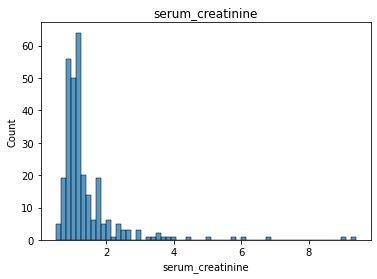

In [45]:

plt.figure(figsize = (13,4))
plt.subplot(122)
sns.histplot(df['serum_creatinine'])
plt.title('serum_creatinine')


Text(0.5, 1.0, 'serum_sodium')

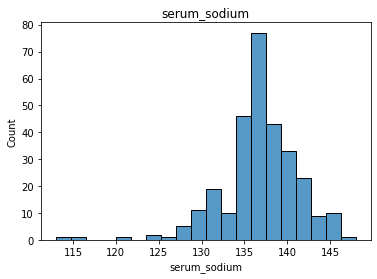

In [46]:


plt.figure(figsize = (13,4))
plt.subplot(122)
sns.histplot(df['serum_sodium'])
plt.title('serum_sodium')


Text(0.5, 1.0, 'sex')

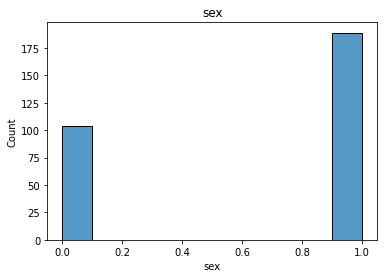

In [47]:


plt.figure(figsize = (13,4))
plt.subplot(122)
sns.histplot(df['sex'])
plt.title('sex')


Text(0.5, 1.0, 'smoking')

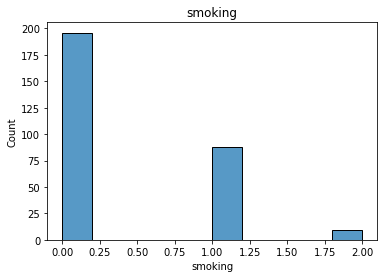

In [48]:


plt.figure(figsize = (13,4))
plt.subplot(122)
sns.histplot(df['smoking'])
plt.title('smoking')
